# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

Use the recent know datetime in the dataset to estimate the age of customers

You have two days to do this study

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import squarify

from datetime import datetime, date

from sklearn.impute import KNNImputer

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep = "\t").drop(columns = ['Z_CostContact', 'Z_Revenue'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


In [4]:
currentYear = datetime.now().year
df['Age'] = currentYear - df['Year_Birth']
df.drop('Year_Birth', axis = 1)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,66
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,69
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,58
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,39
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,4,5,0,0,0,0,0,0,0,56
2236,4001,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,5,7,0,0,0,1,0,0,0,77
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,13,6,0,1,0,0,0,0,0,42
2238,8235,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,10,3,0,0,0,0,0,0,0,67


<AxesSubplot:xlabel='Age'>

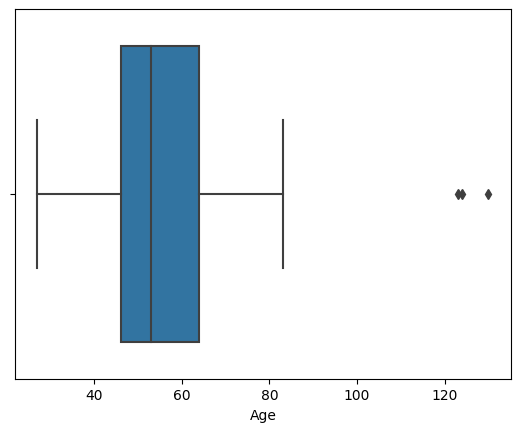

In [5]:
sns.boxplot(x = df['Age'])

# EDA

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
dtype: int64

In [8]:
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,2,7,0,0,0,0,0,0,0,40
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,1,0,0,0,0,0,0,0,37
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,4,2,0,0,0,0,0,0,0,64
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,4,6,0,0,0,0,0,0,0,72
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,3,6,0,0,0,0,0,0,0,41
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,3,8,0,0,0,0,0,0,0,50
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,8,9,0,0,0,0,0,0,0,66
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,2,7,0,0,0,0,0,0,0,66
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,8,1,0,0,0,0,0,0,0,50
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,7,6,0,0,0,0,0,0,0,62


## KNN Imputer

In [9]:
imputer = KNNImputer(n_neighbors = 5)
df['Income'] = imputer.fit_transform(df[['Income']])

__________

In [10]:
df[list(df.iloc[:, 20:].columns)] = df[list(df.iloc[:, 20:].columns)].astype("object")
df[["Kidhome", "Teenhome"]] =  df[["Kidhome", "Teenhome"]].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   object 
 6   Teenhome             2240 non-null   object 
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
"""df.select_dtypes(include = 'number')
df.select_dtypes(include = 'category')

for i in list(df.select_dtypes(include = 'number').columns) :
    sns.histplot(df, x = i)
    plt.show()"""

"df.select_dtypes(include = 'number')\ndf.select_dtypes(include = 'category')\n\nfor i in list(df.select_dtypes(include = 'number').columns) :\n    sns.histplot(df, x = i)\n    plt.show()"

In [13]:
"""fig, axs = plt.subplots(8, 3, figsize = (10, 8))
axs = axs.flatten()
fig.tight_layout(pad = 2.5)

for i, col in enumerate(df.select_dtypes(include = ['int']).columns):
    sns.boxplot(x = df.select_dtypes(include = ['int'])[col], ax = axs[i])"""

"fig, axs = plt.subplots(8, 3, figsize = (10, 8))\naxs = axs.flatten()\nfig.tight_layout(pad = 2.5)\n\nfor i, col in enumerate(df.select_dtypes(include = ['int']).columns):\n    sns.boxplot(x = df.select_dtypes(include = ['int'])[col], ax = axs[i])"

In [14]:
#for i in ["YOLO", "Absurd", "Alone"] :
#    df[df["Marital_Status"] == i ] = "Single"

In [15]:
df["Marital_Status"] = df.Marital_Status.replace(['Alone', 'YOLO', 'Absurd'], 'Single', regex = True)

#### KPI

In [39]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'M', 'F'],
      dtype='object')

In [40]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='Count'>

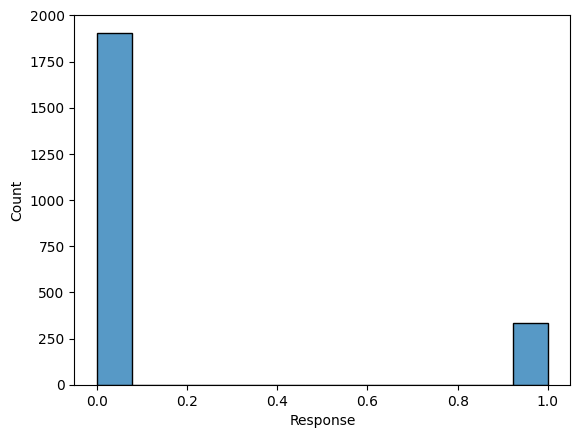

In [11]:
sns.histplot(data = df, x = 'Response')

In [50]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [51]:
df.loc[df['Complain'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,M,F
78,10401,1976,2n Cycle,Together,26326.0,0,0,04-09-2013,12,1,...,0,0,0,0,0,1,0,47,18,3
147,3120,1981,Graduation,Together,38547.0,1,0,28-08-2013,49,6,...,0,0,0,0,0,1,0,42,22,3
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,0,123,72,5
271,5726,1983,Master,Single,31788.0,1,0,20-03-2014,15,16,...,0,0,0,0,0,1,0,40,60,7
355,6201,1978,Graduation,Single,38643.0,1,1,29-11-2013,45,22,...,0,0,0,0,0,1,0,45,49,5
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,...,0,0,0,0,0,1,0,80,969,13
590,3710,1984,PhD,Single,39684.0,1,0,12-10-2012,41,19,...,0,0,0,0,0,1,1,39,87,5
972,10995,1988,2n Cycle,Married,15716.0,1,0,12-11-2012,8,16,...,0,0,0,0,0,1,0,35,100,7
1041,6730,1954,Graduation,Married,38998.0,1,1,03-11-2012,92,34,...,0,0,0,0,0,1,0,69,54,5
1069,2875,1978,Graduation,Married,67023.0,0,0,04-03-2014,93,444,...,0,0,0,0,0,1,0,45,917,23


In [56]:
df['Age'].mean()

54.19419642857143

In [55]:
df['Income'].mean()

52247.25135379061

51741.5

# Customer Segmentation

## RFM

La segmentation RFM permet de calculer la "valeur" des clients et ainsi de les segmenter en fonction de leurs habitudes de consommation.

In [16]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age'],
      dtype='object')

In [17]:
df['M'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [18]:
df['F'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [19]:
df_rfm = df[['ID', 'Recency', 'F', 'M']]

In [20]:
df_rfm.rename(columns = {'F': 'Frequency', 'M': 'MonetaryValue'}, inplace = True)

/tmp/ipykernel_666/2918091929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm.rename(columns = {'F': 'Frequency', 'M': 'MonetaryValue'}, inplace = True)


In [21]:
df_rfm.describe()

,ID,Recency,Frequency,MonetaryValue
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,49.109375,12.537054,643.323661
std,3246.662198,28.962453,7.205741,638.738056
min,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,24.000000,6.000000,75.750000
50%,5458.500000,49.000000,12.000000,414.500000
75%,8427.750000,74.000000,18.000000,1104.250000
max,11191.000000,99.000000,32.000000,2621.000000


In [22]:
df_rfm['R'] = pd.qcut(df_rfm['Recency'], q = 3, labels = [3, 2, 1])

df_rfm['F'] = pd.qcut(df_rfm['Frequency'], q = 3, labels = [1, 2, 3])

df_rfm['M'] = pd.qcut(df_rfm['MonetaryValue'], q = 3, labels = [1, 2, 3])

/tmp/ipykernel_666/53648538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['R'] = pd.qcut(df_rfm['Recency'], q = 3, labels = [3, 2, 1])
/tmp/ipykernel_666/53648538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['F'] = pd.qcut(df_rfm['Frequency'], q = 3, labels = [1, 2, 3])
/tmp/ipykernel_666/53648538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [23]:
df_rfm.groupby("R")["Recency"].mean()

R
3    15.986894
2    49.532148
1    82.572386
Name: Recency, dtype: float64

In [24]:
df_rfm.groupby("F")["Frequency"].mean()

F
1     4.915777
2    13.139756
3    21.598485
Name: Frequency, dtype: float64

In [25]:
df_rfm.groupby("M")["MonetaryValue"].mean()

M
1      55.914553
2     436.372312
3    1438.425703
Name: MonetaryValue, dtype: float64

In [26]:
rfm = df_rfm[['R','F','M']]

In [27]:
for i in rfm.columns:
    print(i)
    print('--------------------')
    print(rfm[i].value_counts())
    print("---------------------------------------------------------------")

R
--------------------
3    763
1    746
2    731
Name: R, dtype: int64
---------------------------------------------------------------
F
--------------------
1    843
2    737
3    660
Name: F, dtype: int64
---------------------------------------------------------------
M
--------------------
1    749
3    747
2    744
Name: M, dtype: int64
---------------------------------------------------------------


In [28]:
df_rfm = df_rfm.reset_index()
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
df_rfm['RFM_Segment_Concat'] = df_rfm.apply(join_rfm, axis = 1)

In [29]:
df_rfm['RFM_Segment_Concat'].nunique()

19

In [30]:
df_rfm['RFM_Segment_Concat'].value_counts()

211    255
311    251
111    243
233    186
322    179
122    169
333    168
133    167
222    164
123     83
323     75
223     67
332     54
132     51
312     36
232     34
112     33
212     24
213      1
Name: RFM_Segment_Concat, dtype: int64

In [31]:
conditions  = [(df_rfm['RFM_Segment_Concat'] == "233") | (df_rfm['RFM_Segment_Concat'] == "333") | (df_rfm['RFM_Segment_Concat'] == "323") ,(df_rfm['RFM_Segment_Concat'] == "122") | (df_rfm['RFM_Segment_Concat'] == "211") | (df_rfm['RFM_Segment_Concat'] == "111") | (df_rfm['RFM_Segment_Concat'] == "121") | (df_rfm['RFM_Segment_Concat'] == "131") | (df_rfm['RFM_Segment_Concat'] == "112") ,  (df_rfm['RFM_Segment_Concat'] == "311") | (df_rfm['RFM_Segment_Concat'] == "312") , (df_rfm['RFM_Segment_Concat'] == "332") | (df_rfm['RFM_Segment_Concat'] == "223") | (df_rfm['RFM_Segment_Concat'] == "232") | (df_rfm['RFM_Segment_Concat'] == "322") | (df_rfm['RFM_Segment_Concat'] == "123")]

choices = ['Champions', "Low Potential", "New Customers", "Potential"]

df_rfm["RFM_Level"] = np.select(conditions, choices, default = "Require activation")

In [32]:
#Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = df_rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Champions             30.7      20.9        1446.4   429
Low Potential         70.2       6.6         139.8   700
New Customers         16.0       4.9          68.7   287
Potential             37.3      14.8         820.0   417
Require activation    67.7      17.0         886.9   407


In [33]:
values = rfm_level_agg["MonetaryValue"]["count"].values

In [34]:
rfm_level_agg

Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Champions             30.7      20.9        1446.4   429
Low Potential         70.2       6.6         139.8   700
New Customers         16.0       4.9          68.7   287
Potential             37.3      14.8         820.0   417
Require activation    67.7      17.0         886.9   407

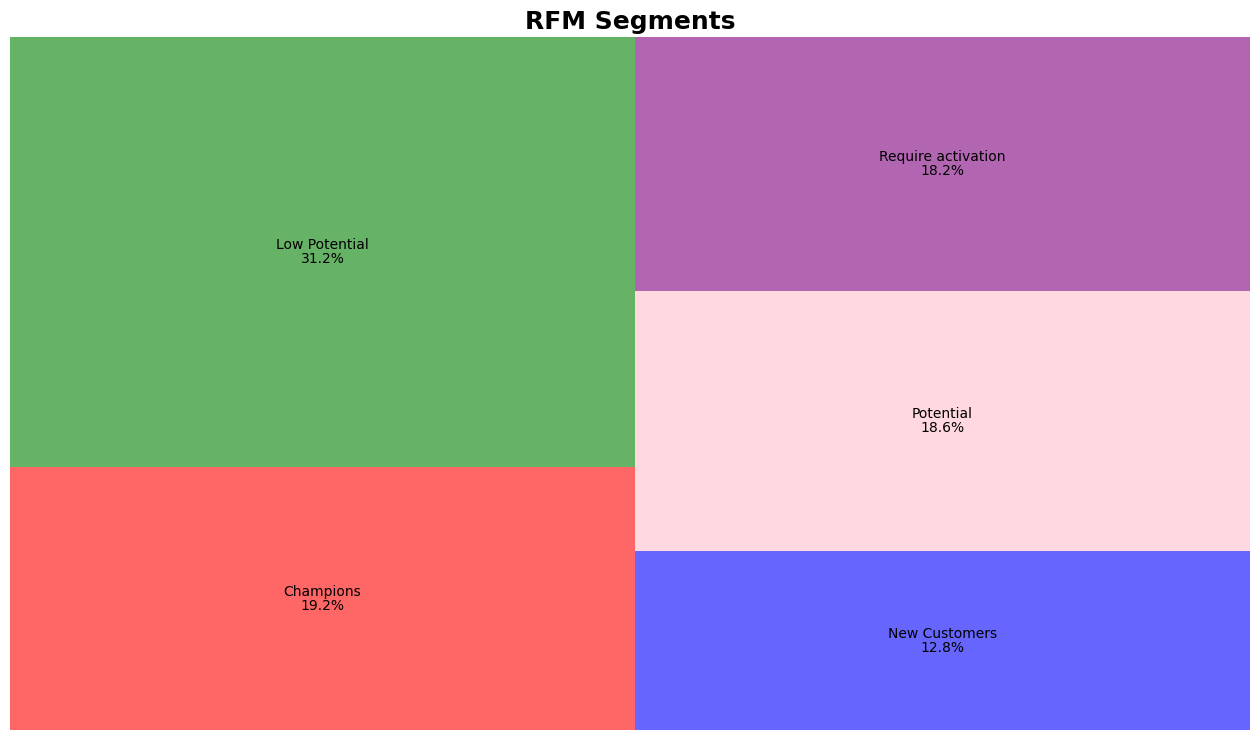

In [35]:
rfm_level_agg.columns = rfm_level_agg.columns#.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Champions', "Low Potential", "New Customers", "Potential", 'Require activation']
              , value=[f'{round(x/sum(values)*100,1)}%' for x in values],alpha=.6, color=["red","green","blue", "pink","purple","orange"] )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# Conlusions